In [8]:
!pip install xgboost

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder, MinMaxScaler, MaxAbsScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
import xgboost as xgb
from xgboost import XGBRegressor
#from catboost import CatBoostRegressor
from numpy import mean
from numpy import std

In [10]:
casas = pd.read_csv("kc_house_data.csv")

casas.drop(['id'],axis=1,inplace=True)
casas.drop(['date'],axis=1,inplace=True)




In [11]:
casas['bedrooms'] = casas['bedrooms'].replace([33], int(casas[casas['price'] == 640000]['bedrooms'].mean()))

In [12]:
imputer = KNNImputer(n_neighbors=5)
casas[['sqft_basement', 'yr_renovated']] = imputer.fit_transform(casas[['sqft_basement', 'yr_renovated']])

In [13]:
def create_model(data, target, algo, scaler=None):
	if scaler != None:
		X = scaler.fit_transform(data)
	else:
		X = data
	y = target
	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)
	model = algo
	model.fit(X_train, y_train)
	return(model, X_train, X_test, y_train, y_test)

casas = casas.drop_duplicates()

condition = (casas['sqft_living'] > casas['sqft_lot']) & (casas['floors'] == 1)
for index, row in casas[condition].iterrows():
    casas.at[index, 'sqft_living'] = row['sqft_living15']
    casas.at[index, 'sqft_lot'] = row['sqft_lot15']

condition = (casas['sqft_living15'] > casas['sqft_lot15']) & (casas['floors'] == 1)
for index, row in casas[condition].iterrows():
    casas.at[index, 'sqft_living15'] = row['sqft_living']
    casas.at[index, 'sqft_lot15'] = row['sqft_lot']

scaler = MinMaxScaler()
casas['bedrooms'] = scaler.fit_transform(casas[['bedrooms']])
casas['grade'] = scaler.fit_transform(casas[['grade']])
casas['bathrooms'] = scaler.fit_transform(casas[['bathrooms']])
casas['floors'] = scaler.fit_transform(casas[['floors']])
casas['view'] = scaler.fit_transform(casas[['view']])
casas['sqft_above'] = scaler.fit_transform(casas[['sqft_above']])
casas['yr_built'] = scaler.fit_transform(casas[['yr_built']])
casas['sqft_living'] = scaler.fit_transform(casas[['sqft_living']])
casas['sqft_lot'] = scaler.fit_transform(casas[['sqft_lot']])
casas['sqft_living15'] = scaler.fit_transform(casas[['sqft_living15']])
casas['sqft_lot15'] = scaler.fit_transform(casas[['sqft_lot15']])
casas['condition'] = scaler.fit_transform(casas[['condition']])
casas['sqft_basement'] = scaler.fit_transform(casas[['sqft_basement']])
casas['yr_renovated'] = scaler.fit_transform(casas[['yr_renovated']])
casas['zipcode'] = scaler.fit_transform(casas[['zipcode']])
casas['lat'] = scaler.fit_transform(casas[['lat']])
casas['long'] = scaler.fit_transform(casas[['long']])

# Especificar colunas de features (X) e coluna alvo (y)
features = casas.drop("price", axis=1)  # Remova a coluna alvo "price" das features
target = casas["price"]


Modelo: RandomForestRegressor
Mean Squared Error (MSE): 16496804241.190886
R2 (Test) : 0.8762746052697741
R2 (Training) : 0.9820360553504055
--------------------------------------------------


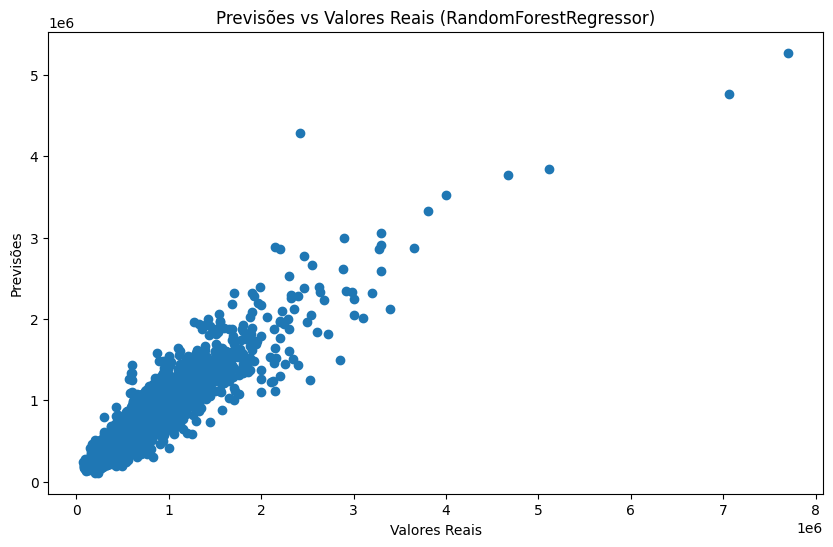

Modelo: LinearRegression
Mean Squared Error (MSE): 39866720596.89674
R2 (Test) : 0.7010011351086625
R2 (Training) : 0.6993626963633316
--------------------------------------------------


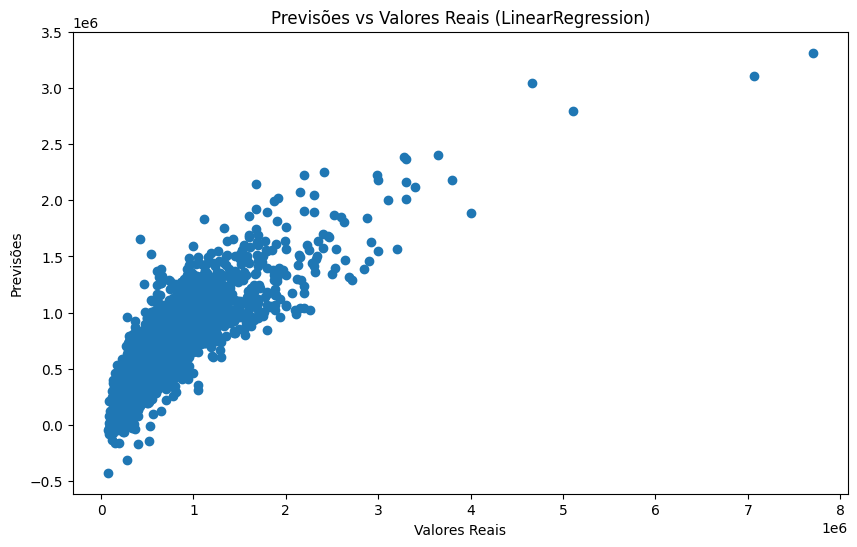

Modelo: SVR
Mean Squared Error (MSE): 140746744384.93735
R2 (Test) : -0.05559514748557692
R2 (Training) : -0.05997739038445249
--------------------------------------------------


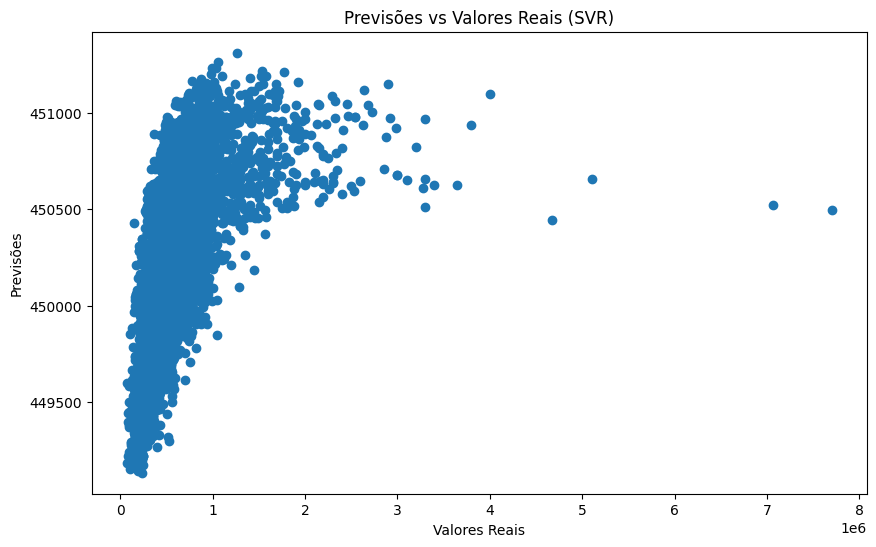

Modelo: GradientBoostingRegressor
Mean Squared Error (MSE): 17321640001.90449
R2 (Test) : 0.8700883689181854
R2 (Training) : 0.9022762897489822
--------------------------------------------------


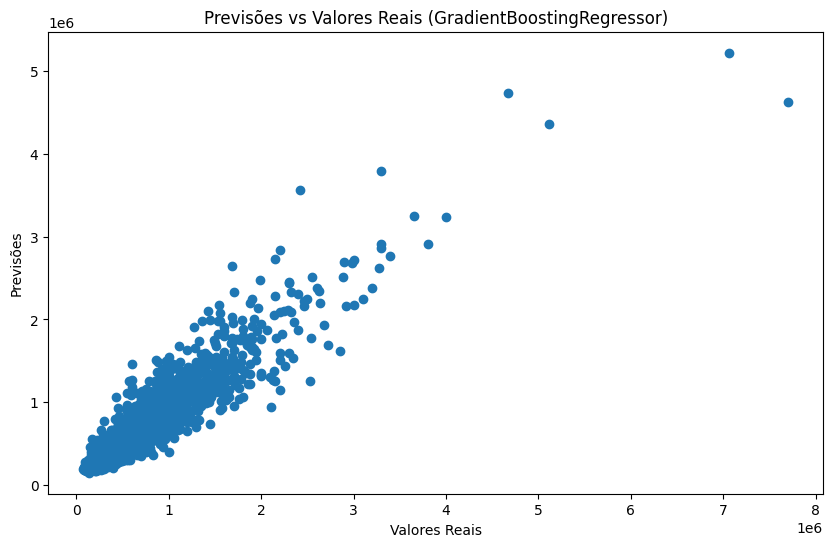

Modelo: KNeighborsRegressor
Mean Squared Error (MSE): 31004343409.879288
R2 (Test) : 0.7674686217612608
R2 (Training) : 0.8611313294783507
--------------------------------------------------


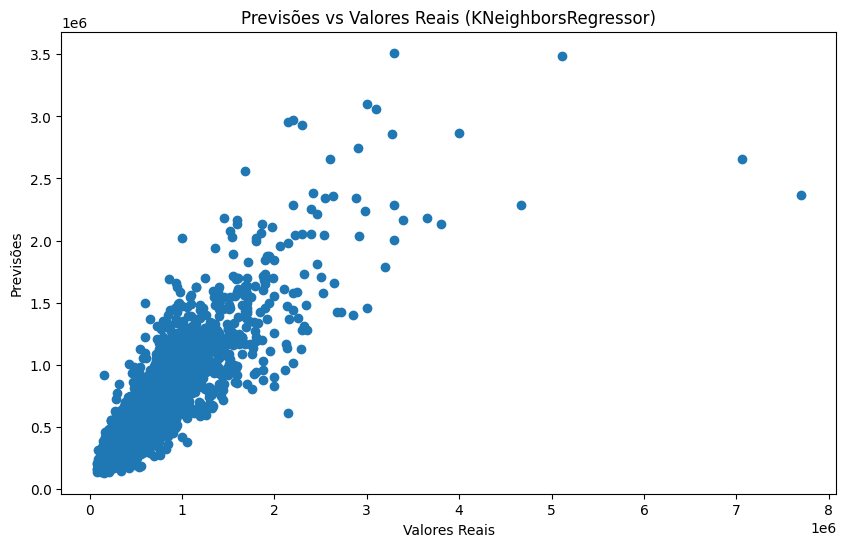

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.229e+14, tolerance: 1.962e+11
  model = cd_fast.enet_coordinate_descent(


Modelo: Lasso
Mean Squared Error (MSE): 39867262163.92507
R2 (Test) : 0.7009970733768645
R2 (Training) : 0.6993517466677845
--------------------------------------------------


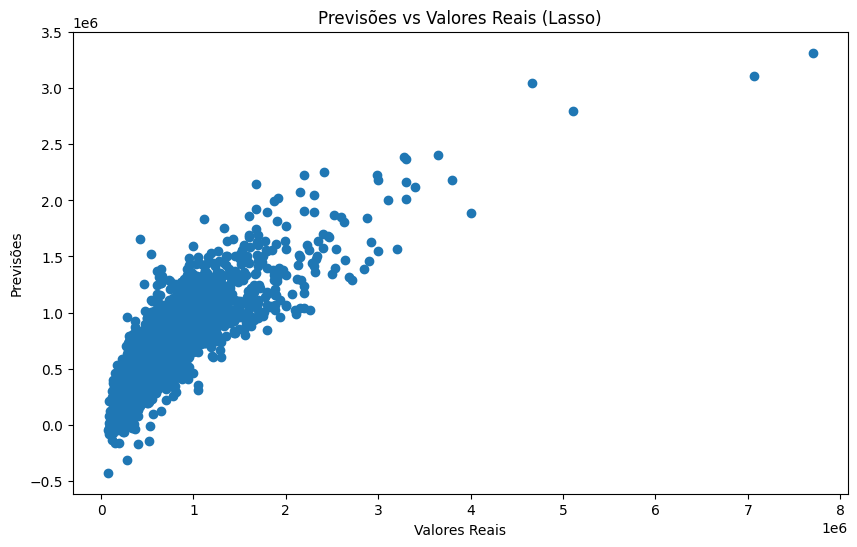

Modelo: Ridge
Mean Squared Error (MSE): 39919867861.71004
R2 (Test) : 0.7006025326750203
R2 (Training) : 0.699320532499552
--------------------------------------------------


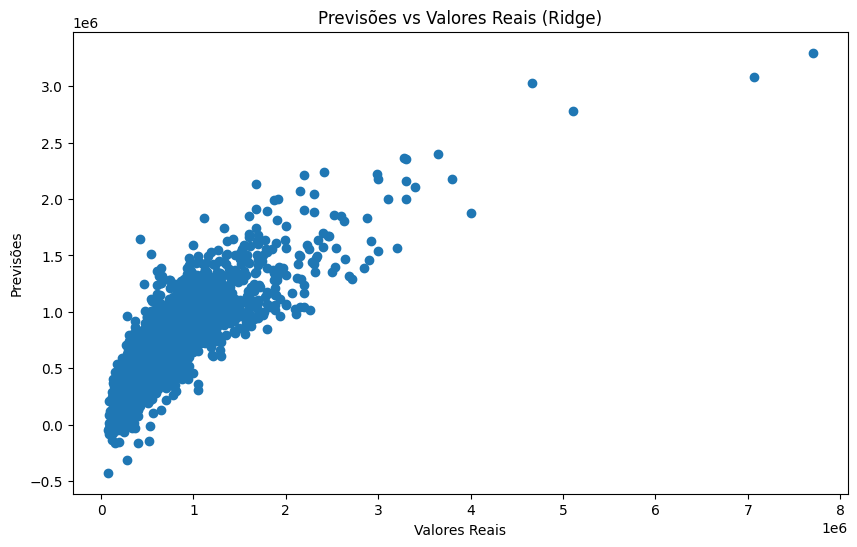

Modelo: ElasticNet
Mean Squared Error (MSE): 118205532693.10605
R2 (Test) : 0.11346306969964937
R2 (Training) : 0.11564512913244729
--------------------------------------------------


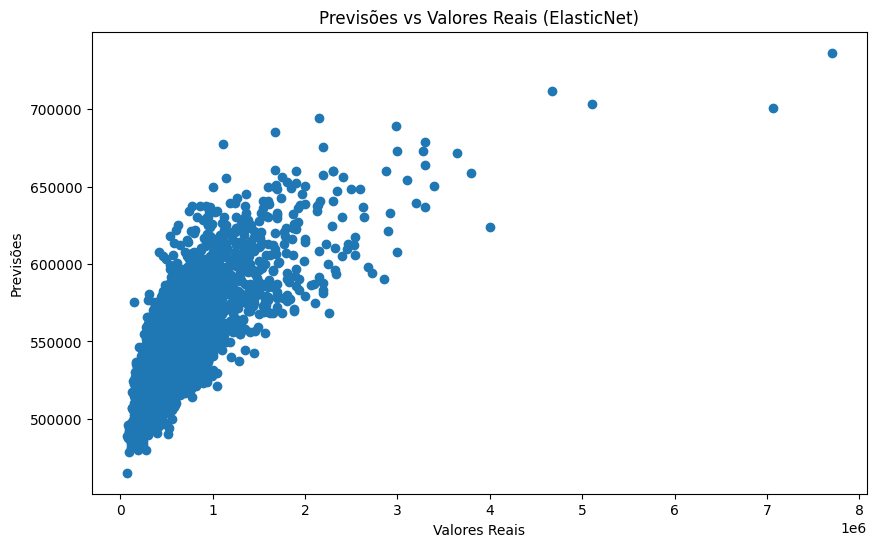

Modelo: XGBRegressor
Mean Squared Error (MSE): 18235334886.450672
R2 (Test) : 0.8632356925694417
R2 (Training) : 0.9790982829750682
--------------------------------------------------


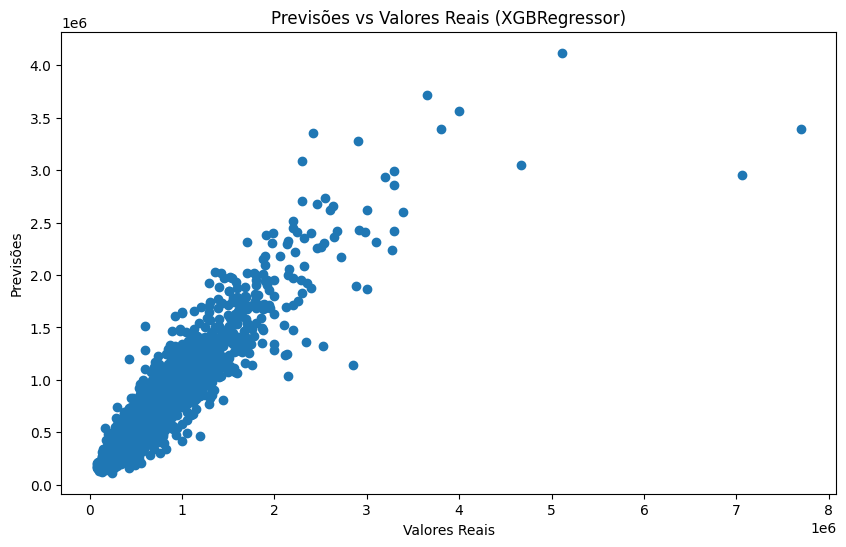

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

# Lista de modelos
modelos = [RandomForestRegressor(), LinearRegression(), SVR(), GradientBoostingRegressor(), KNeighborsRegressor(), Lasso(), Ridge(), ElasticNet(), XGBRegressor()]

for modelo in modelos:
    modelo, X_train, X_test, y_train, y_test = create_model(features, target, modelo, scaler=None)
    
    # Fazendo previsões
    y_pred = modelo.predict(X_test)
    y_pred_train = modelo.predict(X_train)
    
    # Calculando métricas
    mse = mean_squared_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    
    # Imprimindo métricas
    print(f'Modelo: {modelo.__class__.__name__}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'R2 (Test) : {r2_test}')
    print(f'R2 (Training) : {r2_train}')
    print('-'*50)

     # Plotando as previsões
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred)
    plt.xlabel('Valores Reais')
    plt.ylabel('Previsões')
    plt.title(f'Previsões vs Valores Reais ({modelo.__class__.__name__})')
    plt.show()

In [21]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNet
from sklearn.model_selection import cross_val_score

lasso = LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100])
print("Root Mean Squared Error (Lasso): ", np.sqrt(-cross_val_score(lasso, features, target, cv=10, scoring='neg_mean_squared_error')).mean())

elastic = ElasticNet(alpha=0.001)
print("Root Mean Squared Error (ElasticNet): ", np.sqrt(-cross_val_score(lasso, features, target,  cv=10, scoring='neg_mean_squared_error')).mean())

ridge = RidgeCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100])
print("Root Mean Squared Error (Ridge): ", np.sqrt(-cross_val_score(lasso, features, target,  cv=10, scoring='neg_mean_squared_error')).mean())

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 370618225914.125, tolerance: 204936104224.535
  model = cd_fast.enet_coordinate_descent_gram(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20046915217428.688, tolerance: 204936104224.535
  model = cd_fast.enet_coordinate_descent_gram(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 270361696409455.22, tolerance: 204936104224.535
  model = cd_fast.enet_coordinate_descent_gram(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_mo

Root Mean Squared Error (Lasso):  201800.16080555235


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 370618225914.125, tolerance: 204936104224.535
  model = cd_fast.enet_coordinate_descent_gram(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20046915217428.688, tolerance: 204936104224.535
  model = cd_fast.enet_coordinate_descent_gram(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 270361696409455.22, tolerance: 204936104224.535
  model = cd_fast.enet_coordinate_descent_gram(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_mo

Root Mean Squared Error (ElasticNet):  201800.16080555235


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 370618225914.125, tolerance: 204936104224.535
  model = cd_fast.enet_coordinate_descent_gram(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20046915217428.688, tolerance: 204936104224.535
  model = cd_fast.enet_coordinate_descent_gram(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 270361696409455.22, tolerance: 204936104224.535
  model = cd_fast.enet_coordinate_descent_gram(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_mo

Root Mean Squared Error (Ridge):  201800.16080555235


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.563e+14, tolerance: 2.607e+11
  model = cd_fast.enet_coordinate_descent(


/home/codespace/.python/current/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [19:32:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


Root Mean Squared Error (Xgboost):  123809.15574430689
R2 (Teste) : 0.8850352891228804
R2 (Treinamento) : 0.9790982829750682


Text(0.5, 1.0, 'xgboost')

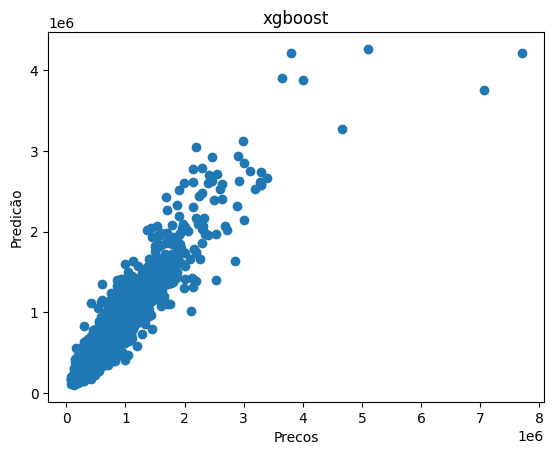

In [23]:
from sklearn import metrics 
regr = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, learning_rate=0.01, max_depth=4, min_child_weight=1.5, n_estimators=7200, reg_alpha=0.9, reg_lambda=0.6, subsample=0.2, seed=42, silent=1)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print("Root Mean Squared Error (Xgboost): ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(f'R2 (Teste) : {r2_score(y_test, y_pred)}')
print(f'R2 (Treinamento) : {r2_score(y_true=y_train, y_pred=modelo.predict(X_train))}')

plt.scatter(y_test, y_pred)
plt.xlabel("Precos")
plt.ylabel("Predicão")
plt.title("xgboost")


In [10]:
pred = pd.DataFrame({'Atual': y_test, 'Predição': y_pred})
pred.head()

,Atual,Predição
15075,690000.0,597995.187500
9685,430000.0,486080.687500
10424,109000.0,184971.046875
19015,581000.0,638945.437500
19154,650000.0,531618.750000
